In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='stidmatt', api_key='YvDcdpSvbA1472hDYsHE')

In [2]:
df = pd.read_csv('approval_poll_putin.csv')

In [3]:
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp,Unnamed: 22,Unnamed: 23
0,Donald Trump,All polls,7/3/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992,rv,0.946437,0.0,46.0,37.0,42.57074,39.47749,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,15:18:36 3 Jul 2018,NaN,NaN
1,Donald Trump,All polls,7/3/2018,1/20/2017,1/22/2017,Gallup,B,1500,a,0.245429,0.0,45.0,45.0,46.10976,43.03960,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,15:18:36 3 Jul 2018,NaN,NaN
2,Donald Trump,All polls,7/3/2018,1/21/2017,1/23/2017,Gallup,B,1500,a,0.226788,0.0,45.0,46.0,46.10976,44.03960,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,15:18:36 3 Jul 2018,NaN,NaN
3,Donald Trump,All polls,7/3/2018,1/20/2017,1/24/2017,Ipsos,B+,1632,a,0.224456,0.0,42.1,45.2,42.36972,43.88869,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,15:18:36 3 Jul 2018,NaN,NaN
4,Donald Trump,All polls,7/3/2018,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,0.220390,0.0,57.0,43.0,51.76586,43.39643,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,15:18:36 3 Jul 2018,NaN,NaN


In [4]:
df['enddate'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in df['enddate']]
df['startdate'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in df['startdate']]

In [5]:
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp,Unnamed: 22,Unnamed: 23
0,Donald Trump,All polls,7/3/2018,2017-01-20,2017-01-22,Morning Consult,B-,1992,rv,0.946437,0.0,46.0,37.0,42.57074,39.47749,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,15:18:36 3 Jul 2018,NaN,NaN
1,Donald Trump,All polls,7/3/2018,2017-01-20,2017-01-22,Gallup,B,1500,a,0.245429,0.0,45.0,45.0,46.10976,43.03960,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,15:18:36 3 Jul 2018,NaN,NaN
2,Donald Trump,All polls,7/3/2018,2017-01-21,2017-01-23,Gallup,B,1500,a,0.226788,0.0,45.0,46.0,46.10976,44.03960,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,15:18:36 3 Jul 2018,NaN,NaN
3,Donald Trump,All polls,7/3/2018,2017-01-20,2017-01-24,Ipsos,B+,1632,a,0.224456,0.0,42.1,45.2,42.36972,43.88869,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,15:18:36 3 Jul 2018,NaN,NaN
4,Donald Trump,All polls,7/3/2018,2017-01-22,2017-01-24,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,0.220390,0.0,57.0,43.0,51.76586,43.39643,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,15:18:36 3 Jul 2018,NaN,NaN


In [6]:
approve = df.groupby('enddate', as_index=False)['approve'].mean()
disapprove = df.groupby('enddate', as_index=False)['disapprove'].mean()
df2 = pd.merge(approve,disapprove, on='enddate')

In [7]:
type(df2['enddate'][0])

datetime.date

In [8]:
first = datetime.strptime('2017-1-20', '%Y-%m-%d').date()

In [9]:
type(first)

datetime.date

In [10]:
df2['date'] = df2['enddate'] - first
df2

,enddate,approve,disapprove,date
0,2017-01-22,45.500000,41.000000,2 days
1,2017-01-23,45.000000,46.000000,3 days
2,2017-01-24,47.044444,44.300000,4 days
3,2017-01-25,44.516667,42.366667,5 days
4,2017-01-26,46.642857,46.757143,6 days
5,2017-01-27,43.620000,47.580000,7 days
6,2017-01-28,45.614286,45.971429,8 days
7,2017-01-29,48.100000,47.200000,9 days
8,2017-01-30,47.520000,48.640000,10 days
9,2017-01-31,46.491667,47.308333,11 days


In [11]:
obamabush=pd.read_csv('obamabush.csv')

In [12]:
obamabush.head()

,Day,Date,Obama Approve,Obama Disapprove,Date.1,Bush Approve,Bush Disapprove
0,8,01/27/09,63.3,20.0,01/27/01,NaN,NaN
1,9,01/28/09,63.3,20.0,01/28/01,NaN,NaN
2,10,01/29/09,63.5,19.3,01/29/01,NaN,NaN
3,11,01/30/09,63.5,19.3,01/30/01,NaN,NaN
4,12,01/31/09,61.8,19.4,01/31/01,NaN,NaN


In [13]:
obamabush['Bush Approve'] = list(map(float, obamabush['Bush Approve']))
obamabush['Bush Disapprove'] = list(map(float, obamabush['Bush Disapprove']))
obamabush.head()

,Day,Date,Obama Approve,Obama Disapprove,Date.1,Bush Approve,Bush Disapprove
0,8,01/27/09,63.3,20.0,01/27/01,NaN,NaN
1,9,01/28/09,63.3,20.0,01/28/01,NaN,NaN
2,10,01/29/09,63.5,19.3,01/29/01,NaN,NaN
3,11,01/30/09,63.5,19.3,01/30/01,NaN,NaN
4,12,01/31/09,61.8,19.4,01/31/01,NaN,NaN


In [14]:
df2['date'][0]

Timedelta('2 days 00:00:00')

In [15]:
df2['date'] = (df2['date'] / np.timedelta64(1, 'D')).astype(int)

In [16]:
df2.head()

,enddate,approve,disapprove,date
0,2017-01-22,45.500000,41.000000,2
1,2017-01-23,45.000000,46.000000,3
2,2017-01-24,47.044444,44.300000,4
3,2017-01-25,44.516667,42.366667,5
4,2017-01-26,46.642857,46.757143,6


In [17]:
df2['Trump approve'] = df2['approve']
df2['Trump disapprove'] = df2['disapprove']
df3 = pd.merge(df2[['Trump approve','Trump disapprove','date']], obamabush[['Day','Obama Approve','Obama Disapprove','Bush Approve','Bush Disapprove']],left_on='date',right_on='Day')

In [18]:
df3

,Trump approve,Trump disapprove,date,Day,Obama Approve,Obama Disapprove,Bush Approve,Bush Disapprove
0,45.614286,45.971429,8,8,63.3,20.0,NaN,NaN
1,48.100000,47.200000,9,9,63.3,20.0,NaN,NaN
2,47.520000,48.640000,10,10,63.5,19.3,NaN,NaN
3,46.491667,47.308333,11,11,63.5,19.3,NaN,NaN
4,47.128571,48.471429,12,12,61.8,19.4,NaN,NaN
5,44.946154,48.838462,13,13,61.8,19.4,NaN,NaN
6,45.020000,48.280000,14,14,61.8,19.4,NaN,NaN
7,45.466667,47.333333,15,15,61.8,19.4,NaN,NaN
8,47.270000,49.300000,16,16,61.8,19.4,NaN,NaN
9,46.653846,49.053846,17,17,61.8,19.4,NaN,NaN


In [19]:
df3['Bush Approve'][0]

nan

In [20]:
df3 = df3[['Trump approve','Trump disapprove','Obama Approve','Obama Disapprove','Bush Approve','Bush Disapprove']]
df3

,Trump approve,Trump disapprove,Obama Approve,Obama Disapprove,Bush Approve,Bush Disapprove
0,45.614286,45.971429,63.3,20.0,NaN,NaN
1,48.100000,47.200000,63.3,20.0,NaN,NaN
2,47.520000,48.640000,63.5,19.3,NaN,NaN
3,46.491667,47.308333,63.5,19.3,NaN,NaN
4,47.128571,48.471429,61.8,19.4,NaN,NaN
5,44.946154,48.838462,61.8,19.4,NaN,NaN
6,45.020000,48.280000,61.8,19.4,NaN,NaN
7,45.466667,47.333333,61.8,19.4,NaN,NaN
8,47.270000,49.300000,61.8,19.4,NaN,NaN
9,46.653846,49.053846,61.8,19.4,NaN,NaN


In [21]:
print(df.shape)
print(df3.shape)

(4552, 24)
(520, 6)


In [22]:
df4 = df3.dropna(axis = 0)

In [23]:
df4

,Trump approve,Trump disapprove,Obama Approve,Obama Disapprove,Bush Approve,Bush Disapprove
23,45.954545,49.690909,62.3,28.5,60.0,21.0
24,43.063636,51.418182,63.2,28.6,59.7,21.2
25,45.578571,48.085714,63.2,28.6,59.5,21.4
26,45.970000,50.440000,63.2,28.6,59.2,21.0
27,42.900000,50.740000,63.0,27.8,58.8,20.7
28,43.500000,50.500000,62.5,27.8,58.5,20.4
29,47.022222,49.000000,62.5,27.8,58.9,20.2
30,46.100000,50.357143,62.5,27.8,59.1,20.5
31,46.571429,49.714286,64.2,27.2,59.3,20.0
32,45.780000,49.380000,64.2,27.2,58.5,22.0


In [24]:
df4['Bush Approve'] = list(map(float, df4['Bush Approve']))
df4['Bush Disapprove'] = list(map(float, df4['Bush Disapprove']))

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



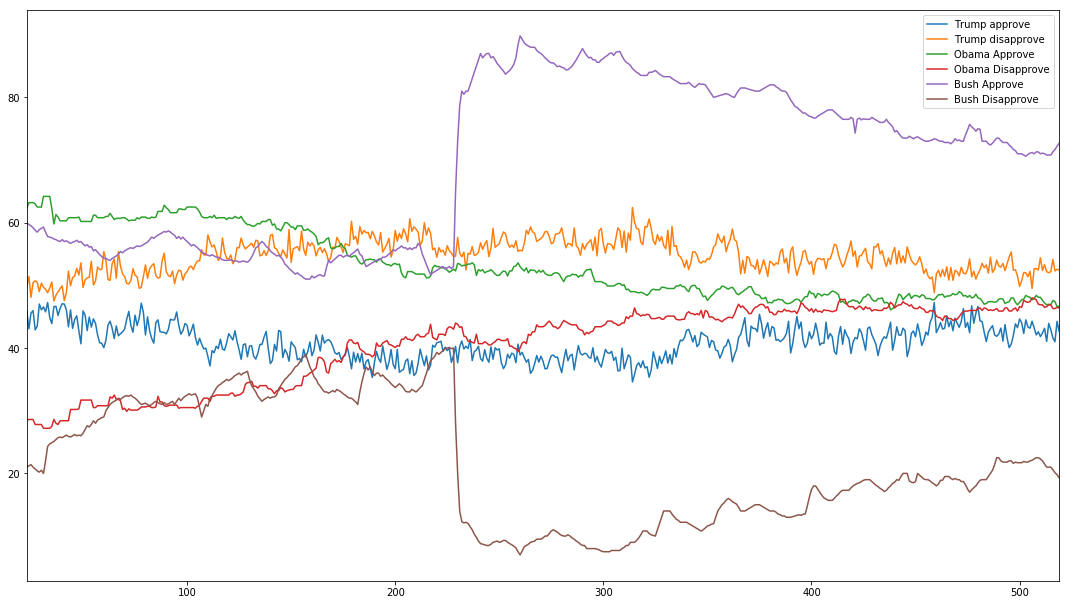

In [25]:
plt.figure()
df4.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


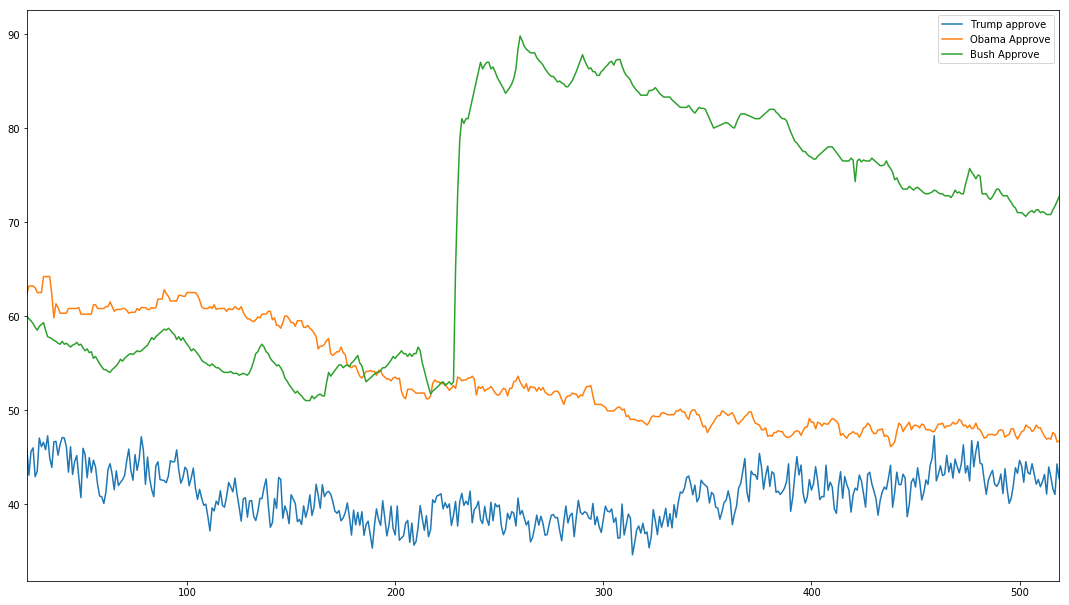

In [26]:
plt.figure()
df4[['Trump approve','Obama Approve','Bush Approve']].plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


In [27]:
df5=obamabush[['Obama Approve','Obama Disapprove','Bush Approve','Bush Disapprove']].dropna(axis=0)

In [28]:
df5

,Obama Approve,Obama Disapprove,Bush Approve,Bush Disapprove
23,62.3,28.5,60.0,21.0
24,63.2,28.6,59.7,21.2
25,63.2,28.6,59.5,21.4
26,63.2,28.6,59.2,21.0
27,63.0,27.8,58.8,20.7
28,62.5,27.8,58.5,20.4
29,62.5,27.8,58.9,20.2
30,62.5,27.8,59.1,20.5
31,64.2,27.2,59.3,20.0
32,64.2,27.2,58.5,22.0


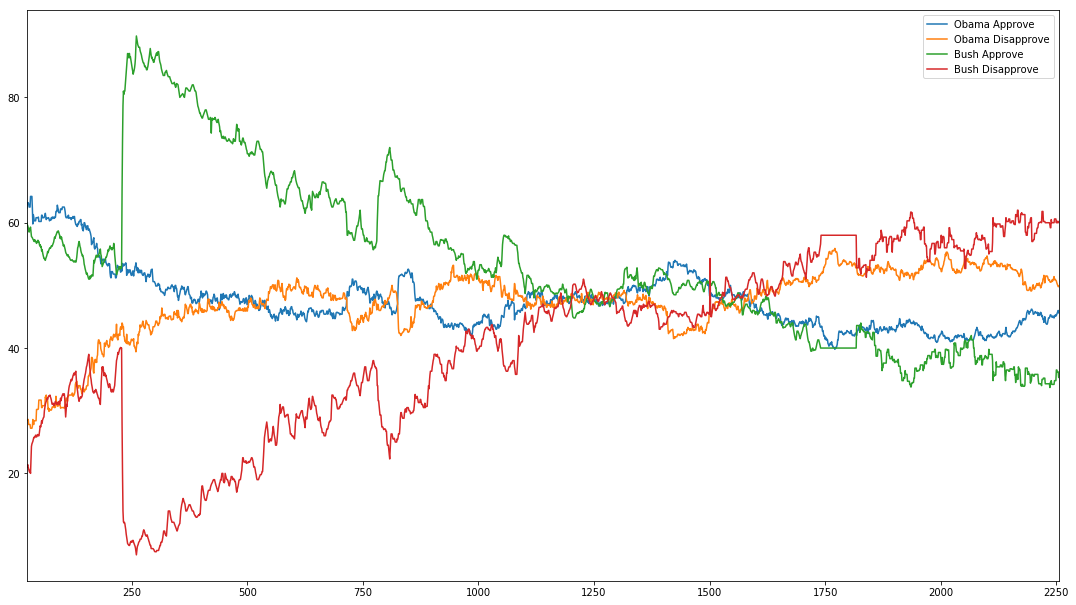

In [29]:
plt.figure()
df5.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


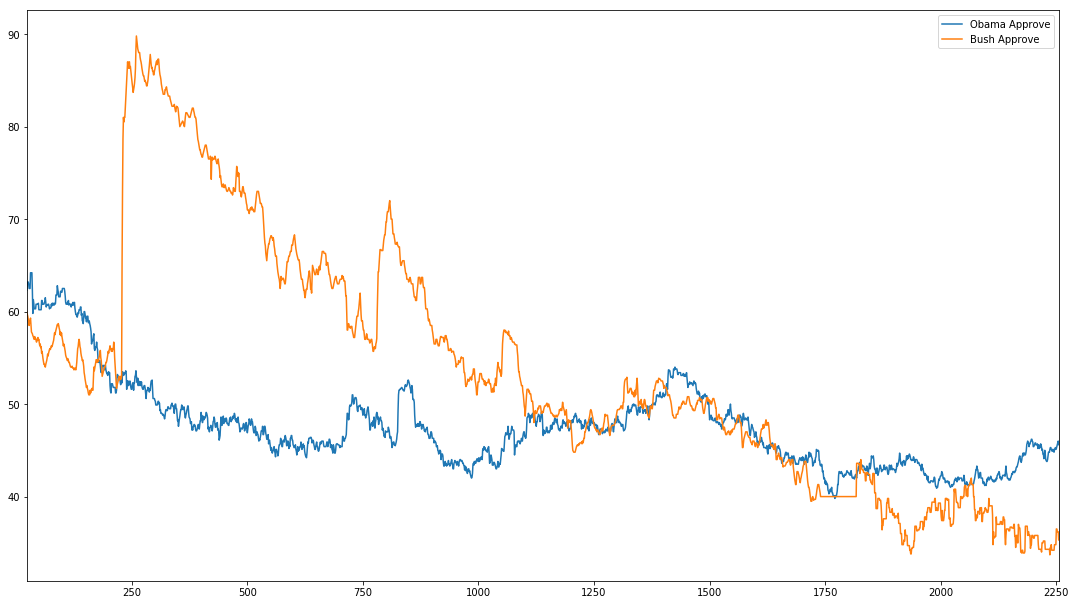

In [30]:
plt.figure()
df5[['Obama Approve','Bush Approve']].plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


In [31]:
obama = list(df5['Obama Approve'])
bush = list(df5['Bush Approve'])
trump = list(df2['approve'])

In [40]:
president = bush + obama + trump
len(president)

7751

In [41]:
len(bush) + len(obama) + len(trump)

7751

In [42]:
print(len(bush))
print(len(obama))
print(len(trump))
print(len(bush) + len(obama) + len(trump))

4992
2233
526
7751


In [43]:
data = pd.DataFrame(president)
data

,0
0,60.000000
1,59.700000
2,59.500000
3,59.200000
4,58.800000
5,58.500000
6,58.900000
7,59.100000
8,59.300000
9,58.500000


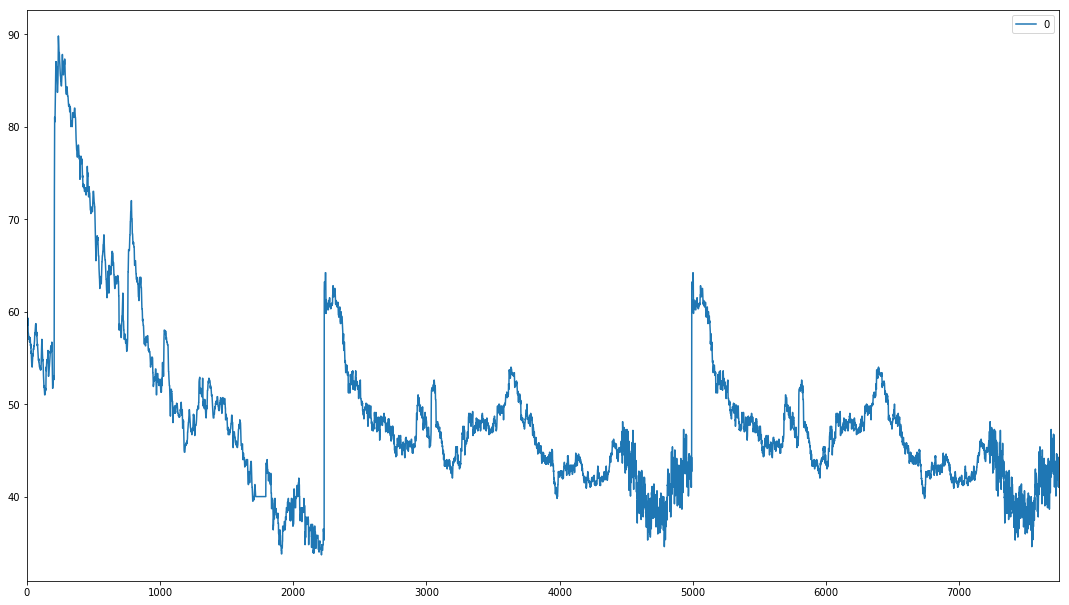

In [44]:
plt.figure()
data.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [45]:
data.shape

(7751, 1)